# A.  Basics on Python


Python is an object oriented programming language very popular amongst data analytics and machine learning apprentices. In this section, we show how to run a simple code under python. 

All implementations need to start with basic imports of necessary modules (classes of objects). In the following example, we import a very useful module, Numerical Python (Numpy), which provides for a variety of functions and operators (methods). Note that numpy syntax is often close to the one you are used to in Matlab. You can find a very useful user quide in the following: https://docs.scipy.org/doc/numpy/index.html . We also import the Matplotlib library which allows to create plots. 

Let us now start with a basic example. 

## 1. Basic imports and plots

In [3]:
import scipy.stats as sc_stats
import numpy as np # choose whatever name you wish to give to numpy, but keep it along your code
import matplotlib.pyplot as plt # you need not import the whole library, only useful modules

Next, we create and plot a period of a sinusoid at frequency $f = 10$ Hz using the functions provided by the environement numpy, and the plot method of matlplotlib.plot

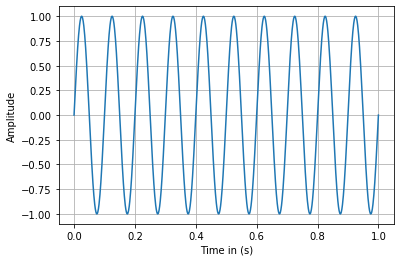

In [4]:
Freq = 10 # frequency in Hz
time = np.linspace(0, 1, 1000) # create a time array 
signal_interest = np.sin(2*np.pi*Freq*time) # compute the sinusoid as a function of this time array

plt.plot(time,signal_interest) # plot the result
plt.xlabel('Time in (s)') # xlabel
plt.ylabel('Amplitude') # ylabel
plt.grid(True) # grid on 

Question: plot the bit probability of error $P_e$ as a function of $\dfrac{E_b}{N_0}$ for an uncoded transmission over additive white Gaussian noise (AWGN) channels! To this end, use the formula $$ P_e = Q \left(\sqrt{2\dfrac{E_b}{N_0}} \right)$$

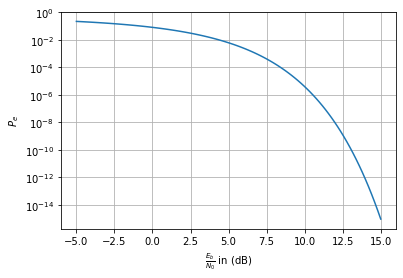

In [8]:
ebno_db = np.linspace(-5,15,100) # snr in dB
ebno = np.power(10*np.ones(len(ebno_db)), ebno_db/10) 
pe = sc_stats.norm.sf(np.sqrt(2*ebno))

plt.plot(ebno_db,pe) # plot the result
plt.xlabel('$\\frac{E_b}{N_0}$ in (dB)') # xlabel
plt.ylabel('$P_e$') # ylabel
plt.yscale('log')
plt.grid(True) # grid on 

## 2. Arrays, loops and indentation

In python, and more specifically numpy, a vector is an array while a matrix is an array of arrays. Almost all operations you know in Matlab have their equivalent in numpy. Loops have a specific syntax, and indentation is crucial in Python, especially for loops. A simple example here allows to generate a matrix with specific entries. 

In [9]:
Nbr_rows = 5 # number of rows
Nbr_cols = 7 # number of columns

M = np.zeros((Nbr_rows, Nbr_cols), dtype = int) # initialize the matrix with integer valued zeros

for ind_rows in range(0,Nbr_rows): # first loop on the row indices
    for ind_cols in range(0,Nbr_cols): # seconf loop on the row indices
        M[ind_rows, ind_cols] = ind_rows + ind_cols  # instantiation of the matrix
    
M # print the result 

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 1,  2,  3,  4,  5,  6,  7],
       [ 2,  3,  4,  5,  6,  7,  8],
       [ 3,  4,  5,  6,  7,  8,  9],
       [ 4,  5,  6,  7,  8,  9, 10]])

 - $\textbf{Warning}$: do not forget the ":" at the end of the loop definition !  
 - The same syntax holds for while, if, ... 
 - Operators "and" and "or" are well defined in python 
 - As in Matlab, pre-allocation is crucial in python    
 

## 3. Definition of functions

To define a function, you need to use the method def(). A simple example is given below. 

In [10]:
# Define the function
def dB_to_lin(x):
    return 10.0**(x/10.0)

# Test the function
x_db = np.array([1,2,5,8,10]) # define an array of SNRs in dB
dB_to_lin(x_db) # compute the corresponding linear scale SNRs

array([ 1.25892541,  1.58489319,  3.16227766,  6.30957344, 10.        ])

# B. A simple communication chain

Simulate and plot the BER of an uncoded BPSK transmission over an AWGN as a function of $\dfrac{E_b}{N_0}$ and compare it with the theoretic probability of error obtained herebefore. To this end: 
 - Import useful modules: numpy, matplotlib.plot, scipy.special.norm, ... 
 - Define the different parameters of your code 
 - Define functions for: 
   - BPSK modulation
   - Threshold detection of a BPSK
   - Counting the number of errors
   - Computing the theoretic BER 
 - Simulate the comm chain for each $\dfrac{E_b}{N_0}$  
 - Plot the BER and the probability of error in a logscale 
 - Use long blocklengths for a good averaging

Start EbN0 1/20 [-20.0] /500 No FEC matrix specified, auto switch receiver mode to CLASSIC
[85.0 %][175.8 %] | Ended in 0.0 s
Start EbN0 2/20 [-18.53] /500 [82.6 %][170.0 %] | Ended in 0.0 s
Start EbN0 3/20 [-17.05] /500 [83.8 %][172.0 %] | Ended in 0.0 s
Start EbN0 4/20 [-15.58] /500 [79.2 %][156.4 %] | Ended in 0.0 s
Start EbN0 5/20 [-14.11] /500 [84.0 %][155.6 %] | Ended in 0.0 s
Start EbN0 6/20 [-12.63] /500 [72.4 %][148.2 %] | Ended in 0.0 s
Start EbN0 7/20 [-11.16] /500 [69.2 %][132.4 %] | Ended in 0.0 s
Start EbN0 8/20 [-9.68] /500 [66.0 %][123.0 %] | Ended in 0.0 s
Start EbN0 9/20 [-8.21] /500 [58.6 %][114.0 %] | Ended in 0.0 s
Start EbN0 10/20 [-6.74] /500 [51.4 %][98.6 %][154.2 %] | Ended in 0.01 s
Start EbN0 11/20 [-5.26] /500 [49.0 %][91.2 %][135.6 %] | Ended in 0.01 s
Start EbN0 12/20 [-3.79] /500 [34.4 %][67.2 %][104.4 %] | Ended in 0.0 s
Start EbN0 13/20 [-2.32] /500 [29.8 %][57.4 %][83.2 %][110.8 %] | Ended in 0.01 s
Start EbN0 14/20 [-0.84] /500 [18.8 %][40.0 %][60.0 %

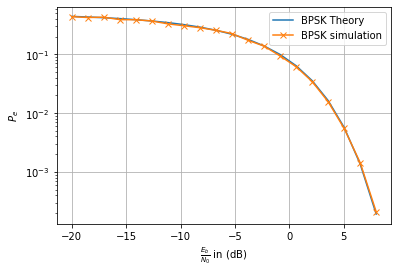

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from src.communications import Transmitter, AWGNChannel, Receiver
from src.utils import *

# Configuration
MODULATION = 'BPSK'
EbN0dBs = np.linspace(-20, 8, 20)

# Initialization
transmitter = Transmitter(MODULATION)
receiver = Receiver(MODULATION)

channel = AWGNChannel(get_bps(MODULATION), transmitter.block_length, transmitter.block_coded_length)

if __name__ == '__main__':
    BER = ber_performance(
        EbN0dBs,
        get_basic_channel_fct(transmitter, channel, receiver),
        1000,
        500
    )

    # Plot results
    plt.figure()
    show_ber(MODULATION, EbN0dBs, BER)
    plt.legend(['BPSK Theory', 'BPSK simulation'])
    plt.show()